<a href="https://colab.research.google.com/github/Karthikadevi017/fswd_code/blob/main/Enhancing_Car_Price_Prediction_Using_Keras_A_Scaled_Regression_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

Predictions vs. Actual Values:

   Actual Price ($)  Predicted Price ($)
0           12000.0         14765.394531
1           18000.0         17467.863281


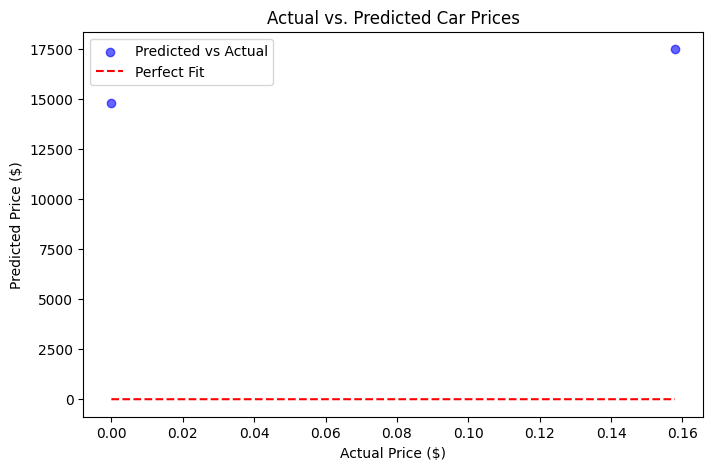


Mean Absolute Error (MAE): 1648.77
Root Mean Squared Error (RMSE): 1991.30


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scalers
X_scaler = StandardScaler()
y_scaler = MinMaxScaler()  # ✅ FIX: Scale target variable

# Scale features
X_scaled = X_scaler.fit_transform(X)

# Scale target variable
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))  # ✅ FIX: Scale target price

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # ✅ FIX: No activation function (outputs raw values)
])

# Compile the model (use 'mape' for percentage error)
model.compile(optimizer='adam', loss='mape', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Predict test set
y_pred_scaled = model.predict(X_test).flatten()

# ✅ FIX: Convert predictions back to original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Display results
results_df = pd.DataFrame({
    'Actual Price ($)': y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten(),
    'Predicted Price ($)': y_pred
})

print("\nPredictions vs. Actual Values:\n")
print(results_df.head(10))  # Show first 10 results

# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Perfect Fit")
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Car Prices")
plt.legend()
plt.show()

# Calculate errors
mae = mean_absolute_error(results_df['Actual Price ($)'], results_df['Predicted Price ($)'])
rmse = np.sqrt(mean_squared_error(results_df['Actual Price ($)'], results_df['Predicted Price ($)']))

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
